In [1]:
import pandas as pd
from scipy import stats
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle("./data/pre-processed-metrics-dataframe.pkl")

# Performing Kruskal-Wallis test

## SLR

In [3]:
def calculate_kruskal_wallis(df, metric):
    grouped_data = [group[metric].values for _, group in df.groupby('scheduler')]
    statistic, p_value = stats.kruskal(*grouped_data)
    return (statistic, p_value)

In [4]:
calculate_kruskal_wallis(df, "SLR")

(505201.6360009387, 0.0)

The p value being less than 0.05 suggests that significant differences exist among these schedulers for the SLR

## Speedup

In [5]:
calculate_kruskal_wallis(df, "speedup")

(320823.7591449945, 0.0)

Same thing suggested for speedup.

## Execution Time

In [6]:
calculate_kruskal_wallis(df, "exec_time")

(356075.64917947404, 0.0)

Same thing suggested for execution time

## Processor Efficiency

In [7]:
calculate_kruskal_wallis(df, "efficiency_processors")

(177896.40647861257, 0.0)

Same thing for processor efficiency, but with the smallest difference among all groups compared to the other metrics.

## Cores Efficiency

In [8]:
calculate_kruskal_wallis(df, "efficiency_cores")

(74174.13622048068, 0.0)

Same thing for cores efficiency, with an even smaller difference than processor efficiency.

Overall, all the metrics of analysis suggest significant difference between the groups being analyzed

# Post-Hoc
Dunns test

In [15]:
def calculate_dunns_test(df, metric):
    dunn_results = sp.posthoc_dunn(df, val_col=metric, group_col='scheduler', p_adjust='bonferroni')
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(dunn_results, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Dunn\'s Test Pairwise P-values for ' + metric)
    plt.show()

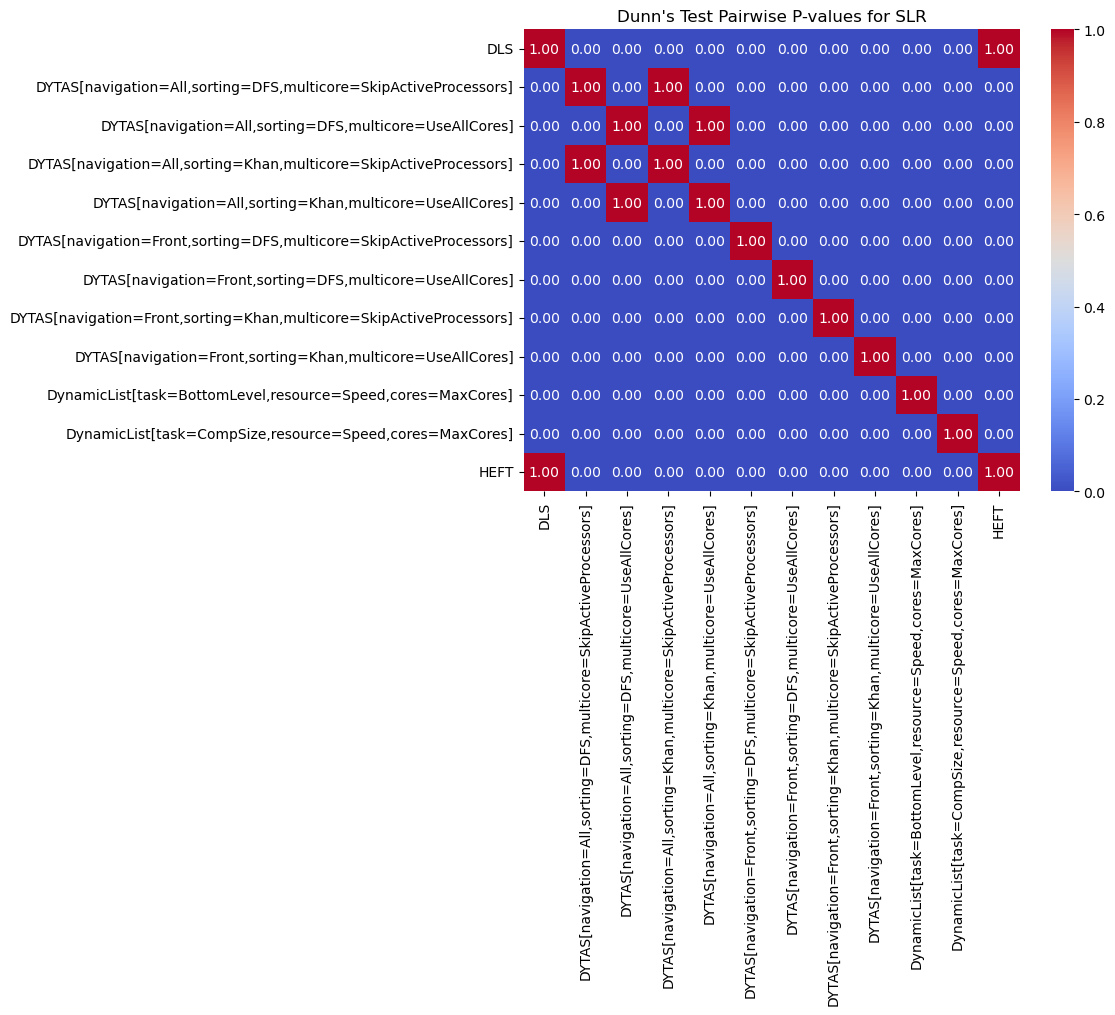

In [16]:
calculate_dunns_test(df, "SLR")

Based on the above Dunn test, there seems to be no statistically significant difference between HEFT and DLS in terms of SLR performance. 

It also suggests that between the DYTAS variants with with `navigation=All` and `multicore=UseAllCores` that the `sorting` criteria, that be `DFS` or `Khan`, statistically do not differ in SLR performance.

This patter is also seen between the DYTAS variants with `navigation=All` and `multicore=SkipActiveProcessors`, further suggesting how the `sorting` criteria method does not provide much statistical significance in SLR performance.

Those are the only 3 cases where no statistically significant differenc is found. The rest of the algorithm pairs do suggest a statistically significant difference in terms of SLR performance.

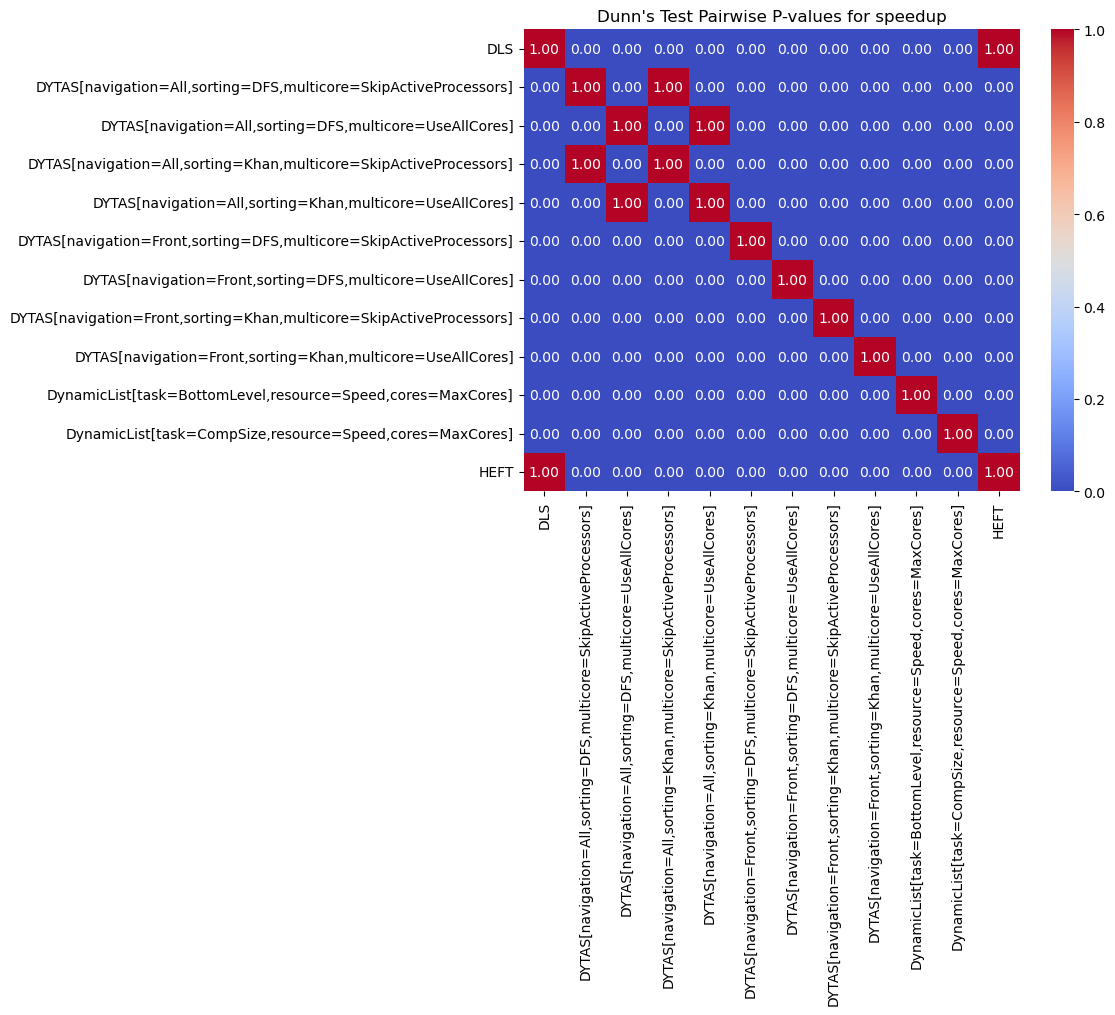

In [17]:
calculate_dunns_test(df, "speedup")

In terms of speedup, we see the same pattern as before.

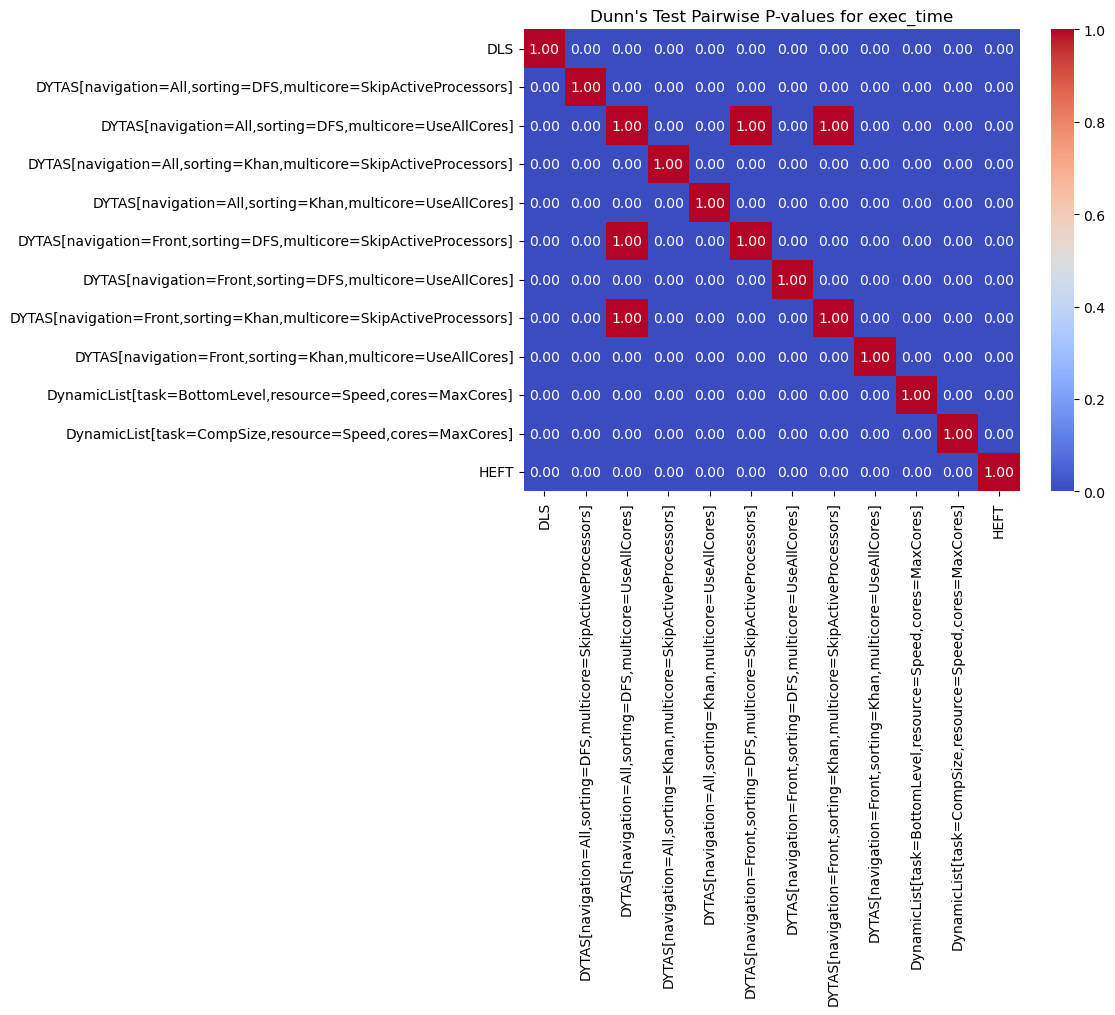

In [18]:
calculate_dunns_test(df, "exec_time")

When it comes to execution time, we do see a difference in pattern.
The DYTAS variant with `navigation=Front` `sorting=DFS` and `multicore=SkipActiveProcessors` showed no statistically significant difference when paired against the one with `navigation=All` `sorting=DFS` and `multicore=UseAllCores`, suggesting that, in terms of execution time, the improvements proposed on DYTAS do not change its execution time.

The DYTAS variant with with `navigation=Front` `sorting=Khan` and `multicore=UseAllCores` also showed no statistically significant difference against the one with `navigation=All` `sorting=DFS` and `multicore=UseAllCores`, suggesting that, in terms of execution time, the navigation method, nor the sorting method, do not change its execution time.

The rest of the pairs did show a statistically significant difference in terms of execution time.

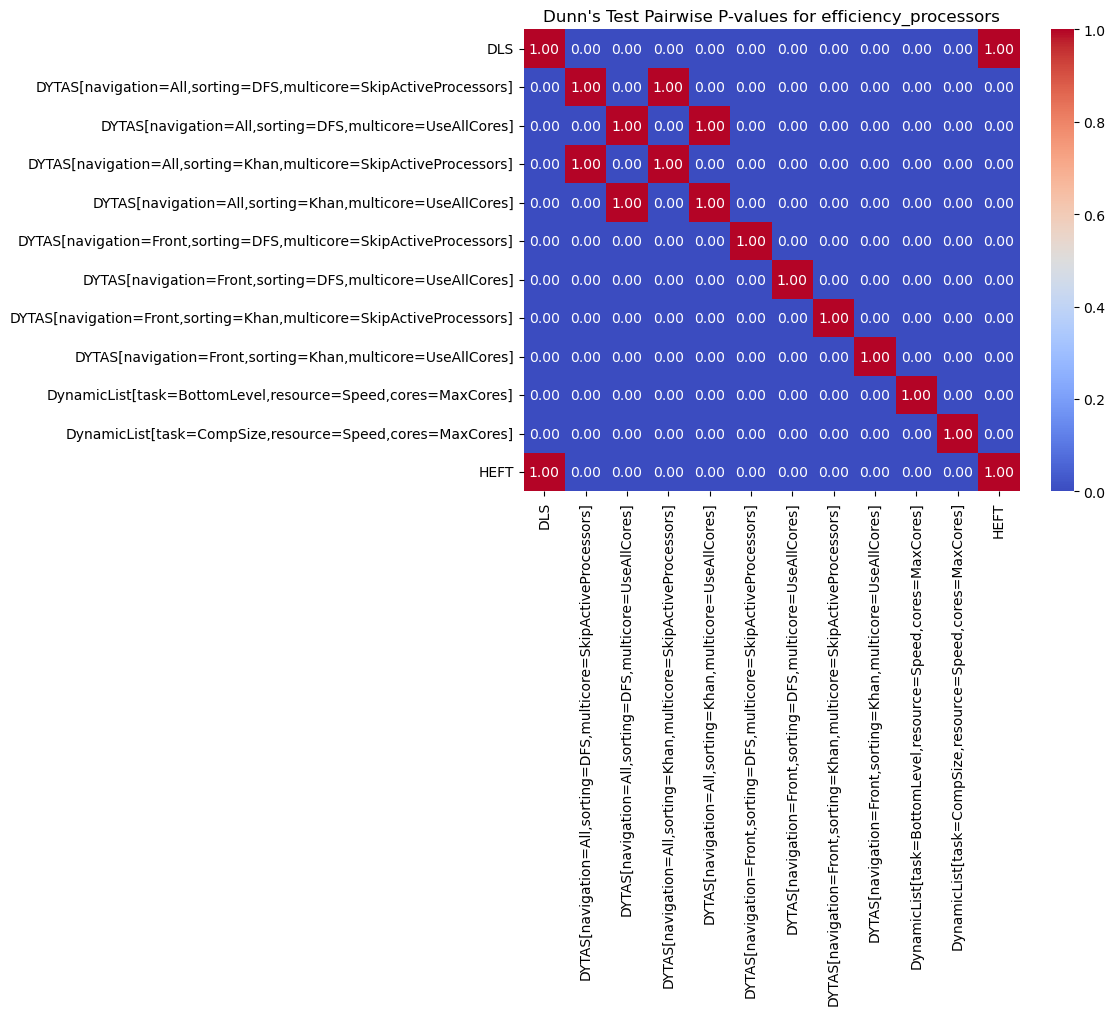

In [19]:
calculate_dunns_test(df, "efficiency_processors")

He see processor eficiency show similar results to SLR and speedup.

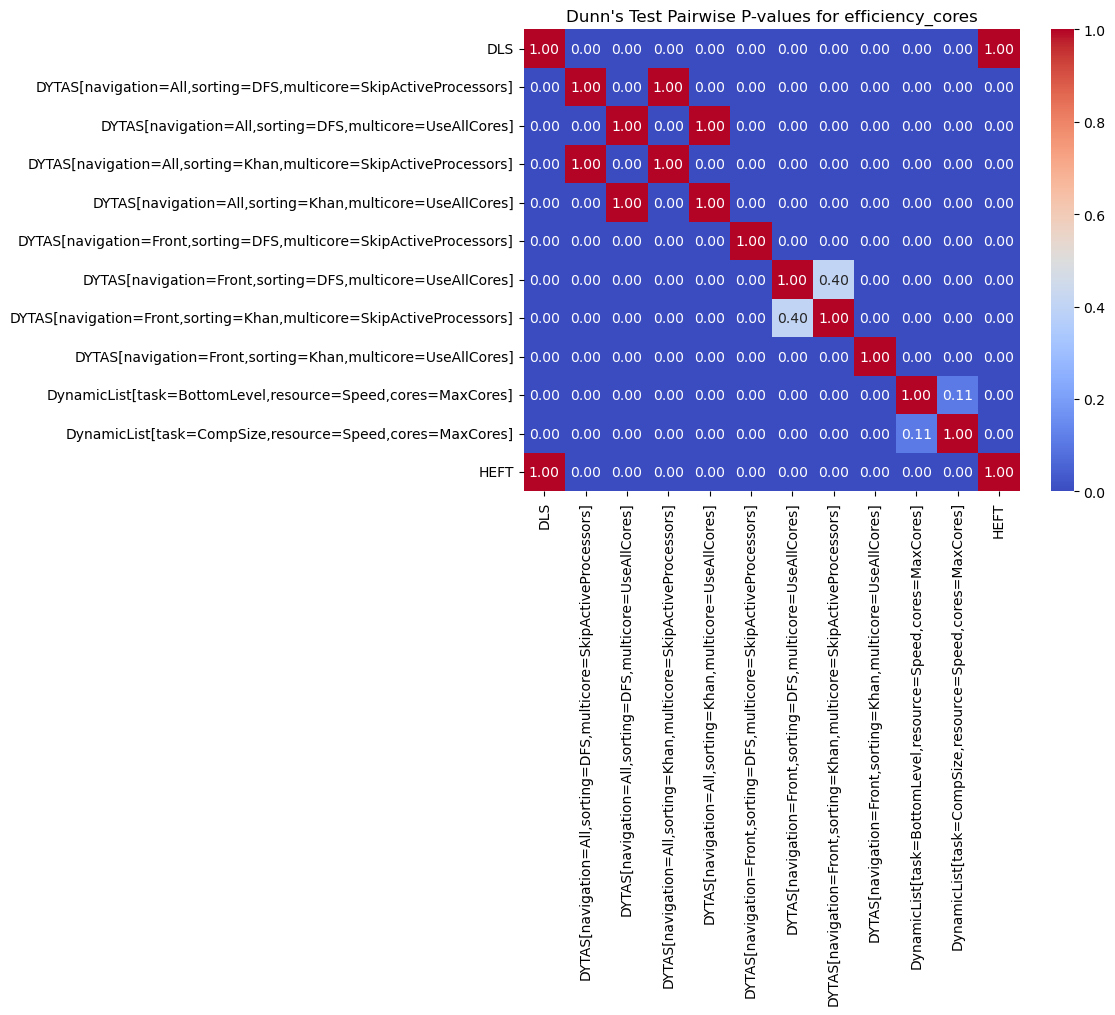

In [20]:
calculate_dunns_test(df, "efficiency_cores")

Core efficiency adds to the results from processor efficiency.

On top of what we saw before, we also see that the DYTAS variant with `navigation=Front` `Sorting=Khan` and `multicore=SkipActiveProcessors` shows no statistically significant difference against the one with `navigation=Front` `sorting=DFS` and `multicore=UseAllCores`, but since all other DYTAS variants do show statistically significant difference between each other, this particular result suggests that the `multicore=UseAllCores` criteria is only useful when paired alongside `navigation=All` as it can leverage assigning more tasks into the same processor within the same PTQ, but when paired with `navigation=Front` the algorithm cannot leverage the multiple cores as well as it could.



The other one that shows no statistically dignificant difference are the DynamicList variants. This makes sense since both these variants are using max core assignments.